# dependencias 

In [1]:
from youtube_transcript_api import YouTubeTranscriptApi
import youtube_dl
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from wordcloud import WordCloud
from itertools import combinations
import igraph as ig

# funciones para el limpiado de los datos

In [121]:
def obtener_enlaces_lista_reproduccion(url_lista):
    # Configuración de youtube_dl para obtener solo los enlaces de la lista de reproducción
    ydl_opts = {'extract_flat': True}

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        # Obtener información de la lista de reproducción
        playlist_info = ydl.extract_info(url_lista, download=False)
        
        # Extraer los enlaces de los videos de la lista de reproducción
        enlaces = [video['url'] for video in playlist_info['entries']]

    return enlaces

def obtener_subtitulos_video(url_video):
    try:
        srt = YouTubeTranscriptApi.get_transcript(url_video, languages=['es'])
        subtitulos = [i['text'] for i in srt]
        subtitulos = ' '.join(subtitulos)
        return subtitulos
    except:
        return None

def obtener_subtitulos_videos(lista_enlaces):
    subtitulos = []
    for enlace in lista_enlaces:
        sub = obtener_subtitulos_video(enlace)
        if sub:
            subtitulos.append(sub)
    return subtitulos

In [122]:
# lista de los url caso 6
lista_enlaces_caso_6 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH')
# obtener los subtitulos de los videos caso 6
subtitulos_caso_6 = obtener_subtitulos_videos(lista_enlaces_caso_6)
# lista de los url caso 7 por lista de reproduccion
lista_enlaces_caso_7_lista_1 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4I3jzi1nnExmLhDPP2_63yr')
lista_enlaces_caso_7_lista_2 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4K-BNKcKeV4nsvklh1Qi601')
lista_enlaces_caso_7_lista_3 = obtener_enlaces_lista_reproduccion('https://www.youtube.com/playlist?list=PLbtegW3d3L4In21BprlyQuW8u0oL6lTXS')
# obtener los subtitulos de los videos caso 7 por lista de reproduccion
subtitulos_caso_7_lista_1 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_1)
subtitulos_caso_7_lista_2 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_2)
subtitulos_caso_7_lista_3 = obtener_subtitulos_videos(lista_enlaces_caso_7_lista_3)

[youtube:tab] PLbtegW3d3L4IpwMvfSW8ceoeVoP5p2iiH: Downloading webpage
[download] Downloading playlist: Caso 06 de la JEP | Unión Patriótica (UP)
[youtube:tab] Downloading page 1
[youtube:tab] playlist Caso 06 de la JEP | Unión Patriótica (UP): Downloading 22 videos
[download] Downloading video 1 of 22
[download] Downloading video 2 of 22
[download] Downloading video 3 of 22
[download] Downloading video 4 of 22
[download] Downloading video 5 of 22
[download] Downloading video 6 of 22
[download] Downloading video 7 of 22
[download] Downloading video 8 of 22
[download] Downloading video 9 of 22
[download] Downloading video 10 of 22
[download] Downloading video 11 of 22
[download] Downloading video 12 of 22
[download] Downloading video 13 of 22
[download] Downloading video 14 of 22
[download] Downloading video 15 of 22
[download] Downloading video 16 of 22
[download] Downloading video 17 of 22
[download] Downloading video 18 of 22
[download] Downloading video 19 of 22
[download] Downloadin

In [ ]:
caso_6='\n'.join(subtitulos_caso_6)
caso_7_1='\n'.join(subtitulos_caso_7_lista_1)
caso_7_2='\n'.join(subtitulos_caso_7_lista_2)
caso_7_3='\n'.join(subtitulos_caso_7_lista_3)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bcriv\AppData\Local\Temp\ipykernel_16424\2035718078.py", line 1, in <module>
    caso_6='\n'.join(subtitulos_caso_6)
                     ^^^^^^^^^^^^^^^^^
NameError: name 'subtitulos_caso_6' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bcriv\miniconda3\envs\semillero\Lib\site-packages\IPython\core\ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

In [ ]:
# guardamos los subtitulos en archivos de texto
with open('../input/caso_6.txt', 'w') as f:
    f.write(caso_6)
with open('../input/caso_7_1.txt', 'w') as f:
    f.write(caso_7_1)
with open('../input/caso_7_2.txt', 'w') as f:
    f.write(caso_7_2)
with open('../input/caso_7_3.txt', 'w') as f:
    f.write(caso_7_3)

In [ ]:
print(len(subtitulos_caso_6),len(subtitulos_caso_7_lista_1),len(subtitulos_caso_7_lista_2),len(subtitulos_caso_7_lista_3),sep='\n') # 6/7/7/7


20
28
15
13


# limpieza de datos 

In [2]:
# leer los txt
with open('../input/caso_6.txt', 'r') as f:
    subtitulos_caso_6 = f.read()
with open('../input/caso_7_1.txt', 'r') as f:
    subtitulos_caso_7_lista1 = f.read()
with open('../input/caso_7_2.txt', 'r') as f:
    subtitulos_caso_7_lista1 = f.read()
with open('../input/caso_7_3.txt', 'r') as f:
    subtitulos_caso_7_lista1 = f.read()



## funciones para la limpieza de datos

In [3]:
nltk.download('punkt')
def normalizacion_regex_texto(texto):
    # Eliminar caracteres o palabras entre [] y ()
    texto = re.sub(r'\[.*?\]', '', texto)
    texto = re.sub(r'\(.*?\)', '', texto)
    # eliminar letras individuales 
    texto = re.sub(r'\b\w\b', '', texto)
    # minimizar, limpieza de espacios, eliminacion de puntuacion  
    palabras = nltk.tokenize.word_tokenize(texto)
    palabras = [palabra.lower() for palabra in palabras if palabra.isalpha()]
    texto = ' '.join(palabras)
    # eliminar acentos o tildes
    texto = re.sub(r'[áéíóúÁÉÍÓÚ]', lambda x: 'aeiouAEIOU'['áéíóúÁÉÍÓÚ'.index(x.group(0))], texto)
    
    return texto

def contar_palabras_con_numeros(texto):
    # Encuentra todas las palabras que contienen al menos un número
    palabras_con_numeros = re.findall(r'\b\w*\d\w*\b', texto)
    
    # Inicializa un diccionario para el conteo de palabras
    conteo_palabras = {}
    
    # Itera sobre las palabras encontradas y cuenta cada una
    for palabra in palabras_con_numeros:
        if palabra in conteo_palabras:
            conteo_palabras[palabra] += 1
        else:
            conteo_palabras[palabra] = 1
    return conteo_palabras

def eliminar_texto_con_numeros(texto):
    texto = re.sub(r'\b\w*\d\w*\b', '', texto)
    return texto

def eliminar_stop_words(texto,stop_words):
    '''eliminar stopwords'''
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]
    texto = ' '.join(palabras)
    return texto

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
len(eliminar_texto_con_numeros(subtitulos_caso_6.replace('\n',' ')))

2496739

In [5]:
# conteo de palabras
conteo_palabras_caso_6 = contar_palabras_con_numeros(subtitulos_caso_6[0])
# eliminar texto con numeros
subtitulos_caso_6_1= eliminar_texto_con_numeros(subtitulos_caso_6.replace('\n',' '))
# normalizar texto
subtitulos_caso_6_1 = normalizacion_regex_texto(subtitulos_caso_6_1)
# eliminar stopwords
## cargamos las palabras 
with open('../input/stop_words_taller4.txt','r') as f:
    stop_words = f.read().splitlines()
subtitulos_caso_6_1 = eliminar_stop_words(subtitulos_caso_6_1,stop_words)

In [6]:
len(subtitulos_caso_6_1)

1536253

# frecuecia de las palabras

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


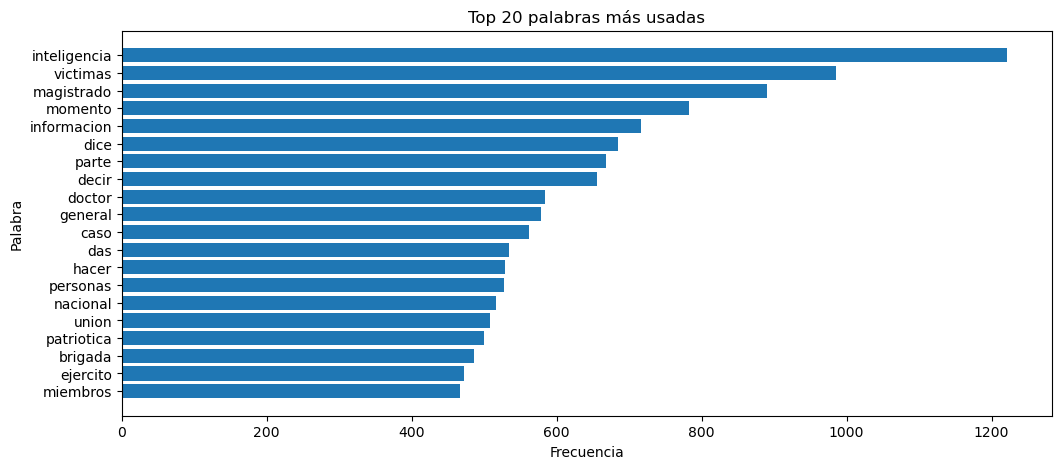

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

def plot_top_words(text, num_words=100):
    '''Genera un gráfico de barras con las palabras más comunes en un texto luego de ser limpiado y tokenizado.'''
    # separar el texto en palabras
    words = text.split(' ')
    words = [word.lower() for word in words if word.isalpha()]
    # Contar la frecuencia de cada palabra
    word_freq = Counter(words)

    # Obtener las palabras más comunes
    top_words = word_freq.most_common(num_words)

    # Preparar datos para el gráfico
    words, freq = zip(*top_words)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(12, 5))
    plt.barh(range(len(words)), freq, align='center')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más comunes estén en la parte superior
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.title(f'Top {num_words} palabras más usadas')
    plt.show()


# Generar el gráfico
plot_top_words(subtitulos_caso_6_1,20)


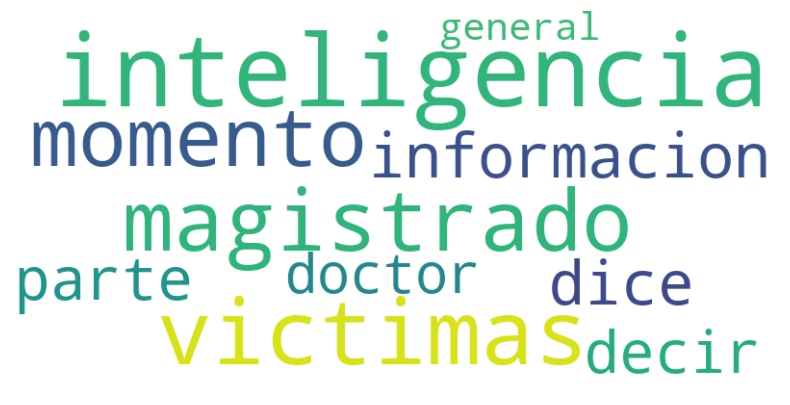

In [8]:

def plot_wordcloud(text, max_words=10):
    # Genera un contador de las palabras en el texto
    word_counts = Counter(text.split())

    # Obtiene las 'max_words' palabras más comunes
    most_common_words = dict(word_counts.most_common(max_words))

    # Genera la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_words)

    # Crea la figura de Matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Ejemplo de uso
texto = "python python plotly plotly plotly wordcloud wordcloud wordcloud"
plot_wordcloud(subtitulos_caso_6_1, max_words=10)


# creacion de bigramas 

In [9]:
def Generacion_de_skipgramas(text, n_palabras, k_saltos):
    '''Genera skipgrams de un texto dado con un tamaño de ventana n y un número de skips k.'''
    # Tokenize words
    words = nltk.word_tokenize(text)
    
    # Initialize list to store skipgrams
    skipgrams_list = []
    
    # Generate skipgrams
    for i in range(len(words)):
        # Create combinations of words with skips
        skipgrams = combinations(words[i:i+n_palabras+k_saltos], n_palabras)
        skipgrams_list.extend(skipgrams)
    
    return skipgrams_list

# Generar skipgrams
skipgrams = Generacion_de_skipgramas(subtitulos_caso_6_1, n_palabras=2, k_saltos=0)

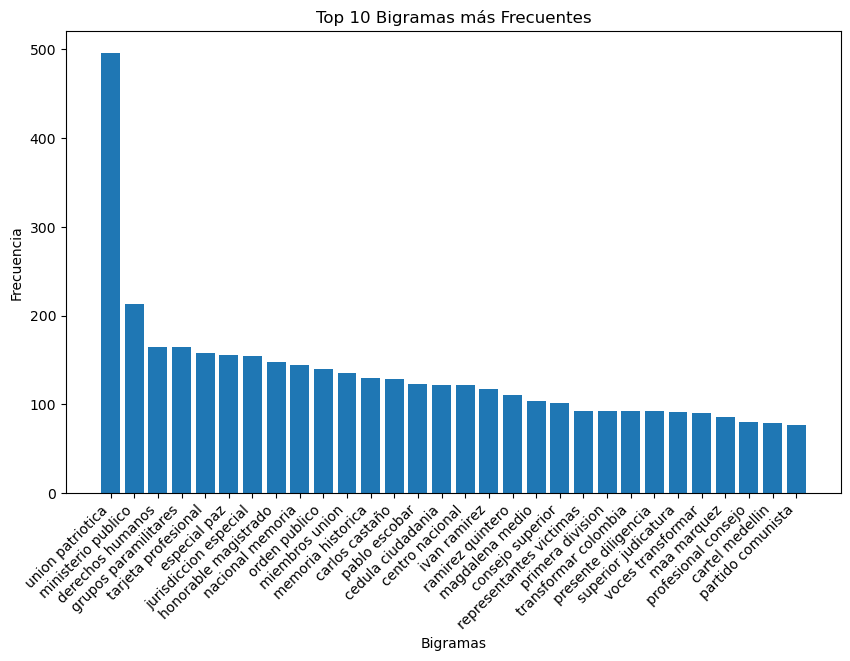

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_bigramas(skipgramas,top_n=10):
    # Conteo de bigramas
    conteo_bigramas = Counter(skipgramas)

    # Obtener los 10 bigramas más frecuentes
    bigramas_mas_frecuentes = conteo_bigramas.most_common(top_n)

    # Obtener datos para el gráfico
    bigramas_unicos = [bigrama[0] for bigrama in bigramas_mas_frecuentes]
    frecuencias = [frecuencia for _, frecuencia in bigramas_mas_frecuentes]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(bigramas_unicos)), frecuencias, tick_label=[f"{bigrama[0]} {bigrama[1]}" for bigrama in bigramas_unicos])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Bigramas')
    plt.ylabel('Frecuencia')
    plt.title('Top 10 Bigramas más Frecuentes')
    plt.show()

# Ejemplo de uso:
plot_bigramas(skipgrams,30)

In [11]:
skipgrams

[('hablen', 'listo'),
 ('listo', 'siendo'),
 ('siendo', 'mañana'),
 ('mañana', 'lunes'),
 ('lunes', 'diciembre'),
 ('diciembre', 'escrito'),
 ('escrito', 'auxiliar'),
 ('auxiliar', 'judicial'),
 ('judicial', 'despacho'),
 ('despacho', 'magistrado'),
 ('magistrado', 'gustavo'),
 ('gustavo', 'salazar'),
 ('salazar', 'vaz'),
 ('vaz', 'permite'),
 ('permite', 'dar'),
 ('dar', 'inicio'),
 ('inicio', 'continuacion'),
 ('continuacion', 'diligencia'),
 ('diligencia', 'version'),
 ('version', 'voluntaria'),
 ('voluntaria', 'compareciente'),
 ('compareciente', 'ivan'),
 ('ivan', 'ramirez'),
 ('ramirez', 'quintero'),
 ('quintero', 'convocada'),
 ('convocada', 'mediante'),
 ('mediante', 'autos'),
 ('autos', 'at'),
 ('at', 'diciembre'),
 ('diciembre', 'at'),
 ('at', 'julio'),
 ('julio', 'caso'),
 ('caso', 'denominado'),
 ('denominado', 'victimizacion'),
 ('victimizacion', 'miembros'),
 ('miembros', 'union'),
 ('union', 'patriotica'),
 ('patriotica', 'parte'),
 ('parte', 'agentes'),
 ('agentes', 'ef

In [12]:
from collections import Counter

def frecuencia_bigramas(lista_bigramas, umbral):
    # Utilizamos Counter para contar las ocurrencias de las tuplas en la lista
    contador = Counter(lista_bigramas)
    
    # Filtramos las tuplas que tienen una frecuencia mayor que el umbral
    tuplas_filtradas = {(tupla , frecuencia)for tupla, frecuencia in contador.items() if frecuencia > umbral}
    
    return tuplas_filtradas

def bigramas_para_grafo(lista_bigramas, umbral=10):
    # Utilizamos Counter para contar las ocurrencias de las tuplas en la lista
    contador = Counter(lista_bigramas)
    
    # Filtramos las tuplas que tienen una frecuencia mayor que el umbral
    tuplas_filtradas = {(tupla ,frecuencia)for tupla, frecuencia in contador.items() if frecuencia > umbral}
    
    return tuplas_filtradas

# Ejemplo de uso
lista = [(1, 2), (3, 4), (1, 2), (5, 6), (3, 4), (1, 2)]
umbral = 1
resultado = frecuencia_bigramas(lista, umbral)
print(resultado)



{((3, 4), 2), ((1, 2), 3)}


In [44]:
bigramas_para_grafos = bigramas_para_grafo(skipgrams,20)

In [45]:
len(bigramas_para_grafos)

217

In [46]:
bigramas_para_grafos

{(('administrativo', 'seguridad'), 49),
 (('alberto', 'romero'), 50),
 (('alejandro', 'botero'), 22),
 (('alejandro', 'sanin'), 21),
 (('alfonso', 'garzon'), 32),
 (('alfredo', 'maa'), 34),
 (('algun', 'momento'), 50),
 (('algun', 'tipo'), 35),
 (('alguna', 'anotacion'), 24),
 (('alguna', 'manera'), 40),
 (('an', 'an'), 23),
 (('andres', 'mario'), 42),
 (('articulo', 'ley'), 45),
 (('auxiliar', 'judicial'), 25),
 (('batallon', 'charry'), 25),
 (('batallon', 'inteligencia'), 47),
 (('bernardo', 'alfonso'), 32),
 (('bernardo', 'franco'), 26),
 (('bernardo', 'jaramillo'), 27),
 (('brigada', 'brigada'), 26),
 (('bu', 'bu'), 33),
 (('buenas', 'tardes'), 39),
 (('carlos', 'castaño'), 128),
 (('cartel', 'medellin'), 79),
 (('cedro', 'cocido'), 25),
 (('cedula', 'ciudadania'), 122),
 (('cedula', 'tarjeta'), 39),
 (('central', 'inteligencia'), 66),
 (('centro', 'memoria'), 45),
 (('centro', 'nacional'), 122),
 (('charry', 'solano'), 73),
 (('ciudad', 'bogota'), 30),
 (('ciudad', 'medellin'), 46

In [47]:
import igraph as ig

def creacion_del_grafo(aristas):
    # Crear un grafo
    G = ig.Graph()

    # Conjunto de nodos existentes
    nodos_existentes = set()

    # Añadir las aristas al grafo
    for arista, peso in aristas:
        nodo1, nodo2 = arista 

        # Verificar si los nodos ya existen
        if nodo1 not in nodos_existentes:
            G.add_vertex(nodo1)  # Agregar vértice origen
            nodos_existentes.add(nodo1)  # Agregar nodo al conjunto de nodos existentes
        if nodo2 not in nodos_existentes:
            G.add_vertex(nodo2)  # Agregar vértice destino
            nodos_existentes.add(nodo2)  # Agregar nodo al conjunto de nodos existentes

        # Agregar arista con peso
        G.add_edge(nodo1, nodo2, weight=peso)

    return G

In [48]:
G = creacion_del_grafo(bigramas_para_grafos)

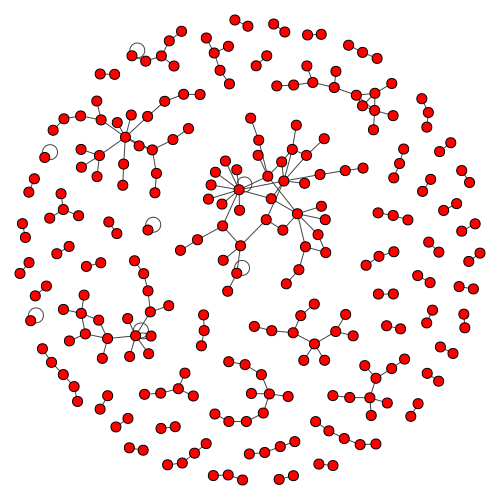

In [50]:

layout=G.layout_kamada_kawai()
ig.plot(G,vertex_size=10, bbox=(500,500))

In [51]:
print(G.vcount(), G.ecount())

255 217
